In [1]:
#importing pandas

import pandas as pd

In [3]:
#reading the data file 

file=pd.read_csv("train.csv")

In [4]:
#first few rows of titanic dataset

file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
file.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Continuous - Continuous Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Fare'>

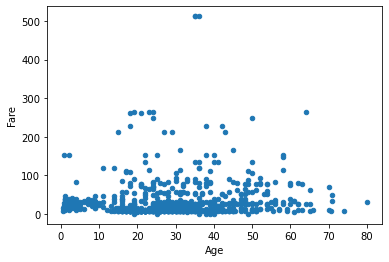

In [7]:
file.plot.scatter('Age','Fare')

In [8]:
file.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
file['Age'].corr(file['Fare'])

0.09606669176903887

# Categorical - Continuous Bivariate Analysis

<AxesSubplot:xlabel='Sex'>

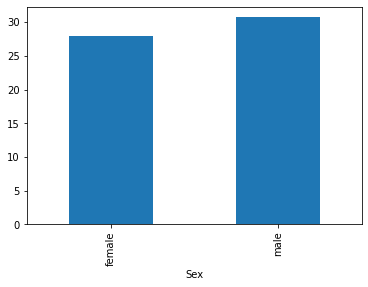

In [10]:
file.groupby('Sex')['Age'].mean().plot.bar()

In [11]:
#importin the scipy library for ttest

from scipy.stats import ttest_ind

In [12]:
male=file[file['Sex']=='male']

In [13]:
female=file[file['Sex']=='female']

In [15]:
ttest_ind(male['Age'],female['Age'],nan_policy='omit')

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

# Categorical - Categorical Bivariate Analysis

In [16]:
pd.crosstab(file['Sex'],file['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [18]:
from scipy.stats import chi2_contingency

In [19]:
chi2_contingency(pd.crosstab(file['Sex'],file['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))